## Clasificacion multiclase

Cuando tenemos un dataset con mas de 2 clases se trata de un problema multiclase

Por ej:
    * Predecir la especie de una flor en iris: 3 clases
    * Predecir la especie en un pinguino: 3 clases
    * Predecir que numero hay en una imagen de 0 a 9: 10 posibilidades o clasess
    
Parametro para metrics como f1, precision, recall
    * macro: cuando el dataset esta balandeado o todas las clases tienen igual importancia
    * micro: desempeño global general, problemas desbalanceados donde el tamaño total importe
    * weighted: cuando el dataset esta desbalanceado y queremos tener en cuenta el tamaño de cada clase
    
ver balanceo:
    * sns.countplot()

X: los datos tienen que ser numericos
y: suele ser habitual convertir a numericos usando .map o labelencoder, pero se pueden mantener asi    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='count'>

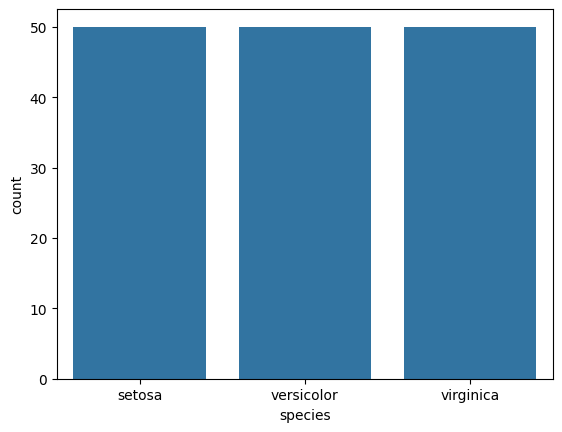

In [3]:
#Clases balanceadas, mismo num de registros de cada especie
sns.countplot(df, x='species')

In [4]:
X = df.drop('species', axis=1)
y = df['species'].map({'setosa': 0,'versicolor': 1, 'virginica': 2})
# particionamiento normal, vemos que puede tomar distinto nro de registros de cada clase, generando un ligero desbalanceo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

species
1    41
0    40
2    39
Name: count, dtype: int64
species
2    11
0    10
1     9
Name: count, dtype: int64


stratify:
* Asegura que la division sea proporcional en funcion de la variable objetivo (species). 
* Se tiene mantener esa proporcion tanto en entrenamiento como en test
* Si no usamos stratify la division es aleatoria
* Si usamos stratify se asegura de que la proporcion de clases en el conjunto de datos original se refleje en los conjuntos de train y test
* Ideal para problemas de clasificacion , en regresion se puede tener en cuenta si hay columnas categoricas

In [5]:
#particionamiento con stratify: le pasamos la columna y con stratify para asegurar un reparto equitativo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

species
0    40
2    40
1    40
Name: count, dtype: int64
species
0    10
2    10
1    10
Name: count, dtype: int64


In [6]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])
def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    #OVR: one vs rest, calcula auc para cada clase de manera individual, considerando cada clase como positiva y las demas como negativas
    #OVO: one vs one, calcula auc para cada par de clases, combina resultados calculando promedio segun metrica average
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') #tiene por defecto macro, hay que pasarle el multiclass
    
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]

Regresion logistica
* en vez de usar la funcion sigmoide que se utiliza en la clasificacion bianria, en clasificacion multiclase se usa una funcion softmax, genera una probabilidad para cada clase de modo que todas sumen 1.

In [7]:
model = LogisticRegression()
calculate_metrics('RLog', model)
df_resultados



,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.966667,0.969697,0.966667,0.966583,1.0
